In [41]:
from utils.image_treatment import preprocess_image, image_to_distribution
from wasserstein.basic_wasserstein import compute_wasserstein_distance, compute_wasserstein_barycenter, compute_wasserstein_sliced_distance, compute_sliced_wass_barycenter
from wasserstein.texture_mixing import compute_steerable_wavelet_atoms_with_extra_frames
import ot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#chargement des images 
image1 = preprocess_image('data/elephant.jpg')
image2 = preprocess_image('data/dent.jpg')
image3 = preprocess_image('data/gateau.png')
x1 = image_to_distribution(image1)
x2 = image_to_distribution(image2)
x3 = image_to_distribution(image3)

## Wasserstein and Sliced Wasserstein Distances

In [5]:
compute_wasserstein_distance(x1, x2)

np.float64(4.640718874430103)

In [5]:
compute_wasserstein_sliced_distance(x1,x2)

np.float64(2.7494474507674793)

## Wasserstein Barycenter

In [51]:
compute_wasserstein_barycenter([x1, x2], k = 200, X_init = None)

array([[ 33.57648664, -30.72911051],
       [ 14.86840704, -18.5448238 ],
       [ 18.33887391, -15.59901501],
       [ 35.41181658, -18.37100263],
       [ 17.37065322, -38.75393498],
       [  9.98467605, -15.77912549],
       [ 13.06196133, -15.96487638],
       [ 17.89442947, -28.53287744],
       [ 22.65854714, -14.96146551],
       [ 21.9775881 , -22.71932714],
       [ 16.35809124, -41.65174204],
       [ 14.80751057, -25.56665336],
       [ 14.12748328,  -9.54113008],
       [ 32.155885  , -34.05104655],
       [ 37.04219494, -32.39471232],
       [ 24.56588799, -14.64878041],
       [ 37.86211773, -43.40016971],
       [ 43.5246248 , -16.39843932],
       [ 28.3858607 , -16.97851985],
       [ 33.32789258, -14.21728062],
       [ 11.49326146, -14.41319756],
       [ 16.661176  ,  -7.63561945],
       [ 21.28027353,  -8.0837077 ],
       [ 29.14021164, -30.87308243],
       [ 24.74882699, -12.28067286],
       [ 30.67548501,  -7.86073675],
       [ 18.01385977, -43.98702206],
 

In [47]:
compute_sliced_wass_barycenter([x1, x2])

array([[ 31.63848406, -11.5154137 ],
       [ 21.52150858, -35.23393966],
       [ 40.5289934 , -11.91845311],
       [ 21.66467063, -21.76327864],
       [ 21.18898611,  -5.44683172],
       [ 25.88113874, -32.19430319],
       [ 31.70090558, -30.15092826],
       [ 20.40335816, -14.94943488],
       [ 20.80617058, -17.05458334],
       [ 37.40876046, -18.09280029],
       [ 15.79479678, -29.26252432],
       [ 20.23460253, -27.23567245],
       [ 25.52450729, -16.09546406],
       [ 32.89268722, -35.96953231],
       [ 30.49756509,  -9.31583847],
       [ 12.64459355, -27.62566763],
       [ 17.07376181, -27.92643115],
       [ 28.4011717 , -33.93727689],
       [ 38.43048531, -31.56687819],
       [ 25.45335074, -12.76746007],
       [ 13.92192149, -30.6707677 ],
       [ 30.50057472,  -7.71829417],
       [ 22.90006517, -23.5018324 ],
       [ 32.89056402, -16.93348162],
       [ 19.48128418, -29.10545678],
       [ 18.05284357, -16.41870862],
       [ 42.82634367, -21.75880606],
 

## Projection 

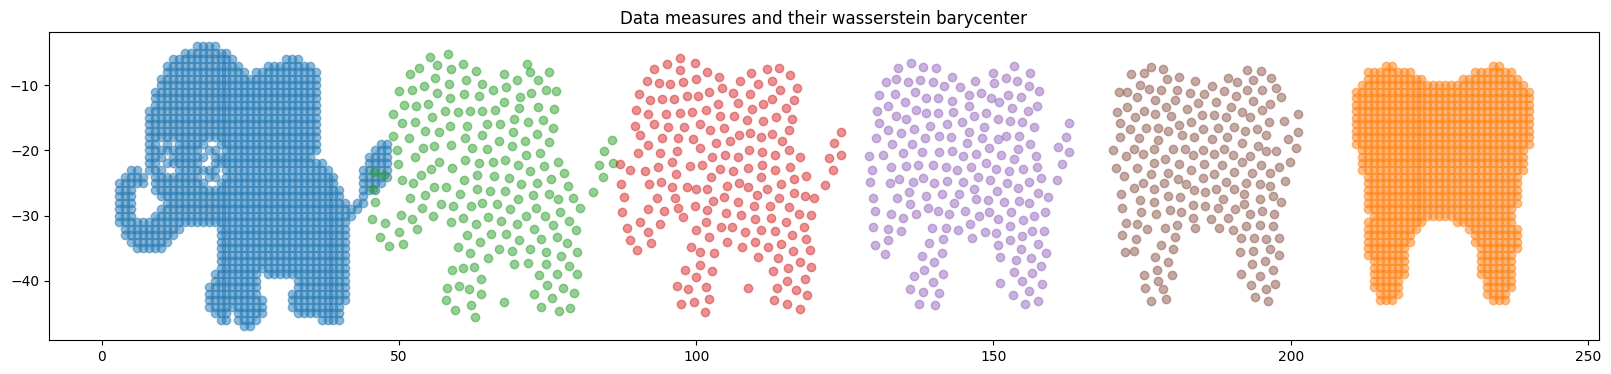

In [8]:
ALPHA = [0.2, 0.4, 0.6, 0.8]
xb = []
for a in ALPHA:
    xb.append(compute_wasserstein_barycenter([x1, x2], k = 200, X_init = None, weights = [1-a, a]))
plt.figure(6, (20, 4))
plt.scatter(x1[:, 0], x1[:, 1], alpha=0.5)
plt.scatter(x2[:, 0]+200, x2[:, 1], alpha=0.5)
for i in range(len(xb)):
    plt.scatter(xb[i][:, 0]+40*i+40, xb[i][:, 1], alpha = 0.5, label='2-Wasserstein barycenter')
plt.title('Data measures and their wasserstein barycenter')
plt.show()

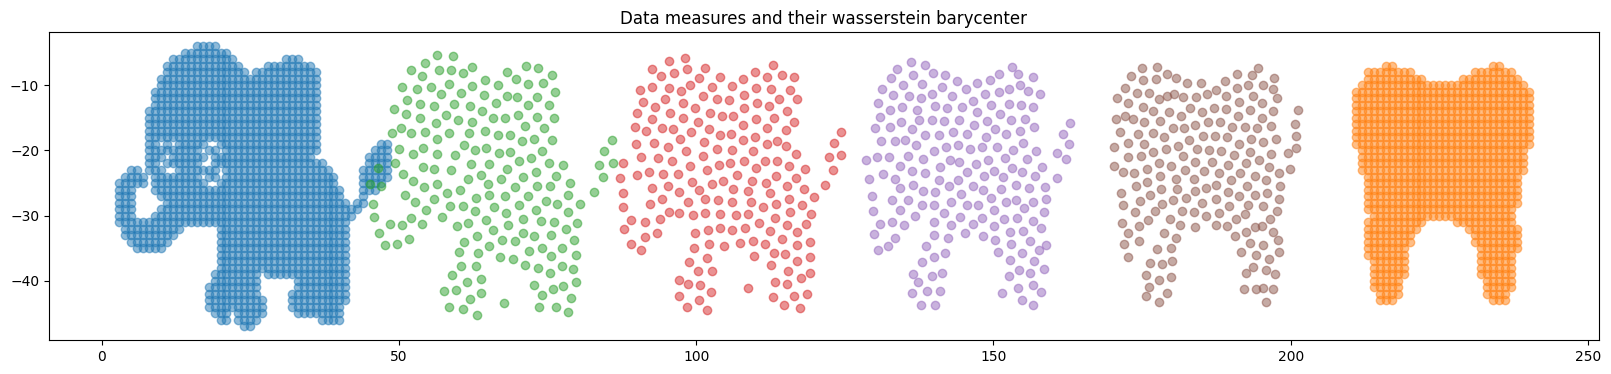

In [5]:
ALPHA = [0.2, 0.4, 0.6, 0.8]
xb_bis = []
for a in ALPHA:
    xb_bis.append(compute_wasserstein_barycenter([x1, x2], k = 200, X_init = None, weights = [1-a, a]))
plt.figure(6, (20, 4))
plt.scatter(x1[:, 0], x1[:, 1], alpha=0.5)
plt.scatter(x2[:, 0]+200, x2[:, 1], alpha=0.5)
for i in range(len(xb_bis)):
    plt.scatter(xb_bis[i][:, 0]+40*i+40, xb_bis[i][:, 1], alpha = 0.5, label='2-Wasserstein barycenter')
plt.title('Data measures and their wasserstein barycenter')
plt.show()

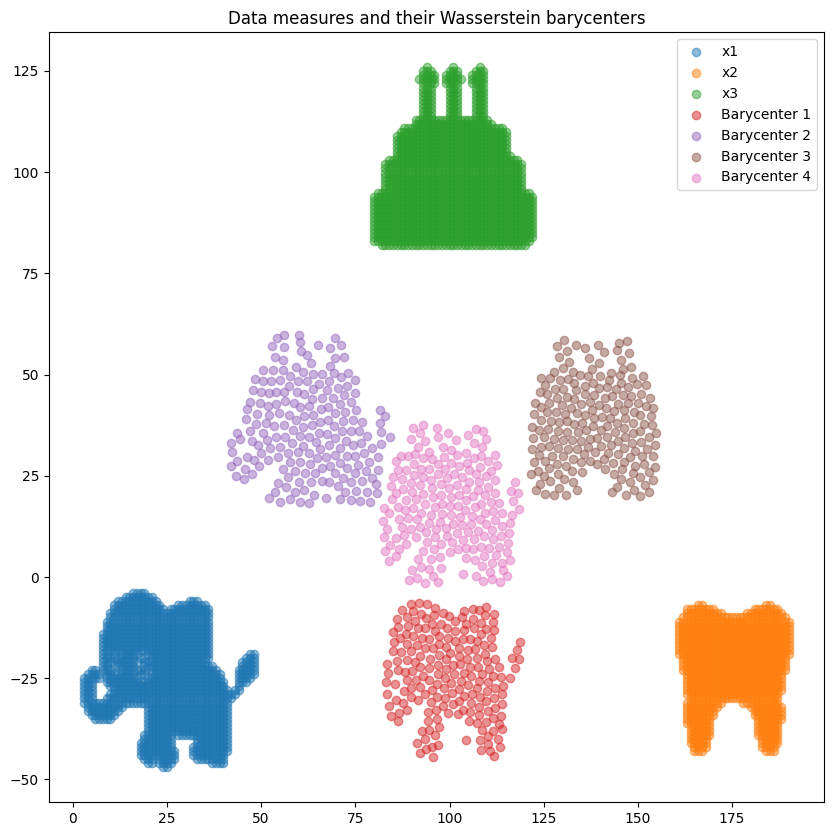

In [39]:
r = 150

weights_list = [[0.5, 0.5, 0], [0.5, 0, 0.5], [0, 0.5, 0.5], [0.33, 0.33, 0.33]]
barycenters = [compute_wasserstein_barycenter([x1, x2, x3], k=200, X_init=None, weights=weights) for weights in weights_list]

plt.figure(figsize=(10, 10))

plt.scatter(x1[:, 0], x1[:, 1], alpha=0.5, label="x1")
plt.scatter(x2[:, 0] + r, x2[:, 1], alpha=0.5, label="x2")
plt.scatter(x3[:, 0] + r/2, x3[:, 1] +  np.sqrt(3) * r/2, alpha=0.5, label="x3")

offsets = [(r/2, 0), (r/4,  np.sqrt(3) * r/4), (3*r/4, np.sqrt(3) * r/4), ((r+r/2)/3,  (np.sqrt(3) * r)/6)]
labels = ["Barycenter 1", "Barycenter 2", "Barycenter 3", "Barycenter 4"]

for xb, (x_offset, y_offset), label in zip(barycenters, offsets, labels):
    plt.scatter(xb[:, 0] + x_offset, xb[:, 1] + y_offset, alpha=0.5, label=label)

plt.title("Data measures and their Wasserstein barycenters")
plt.legend()
plt.show()


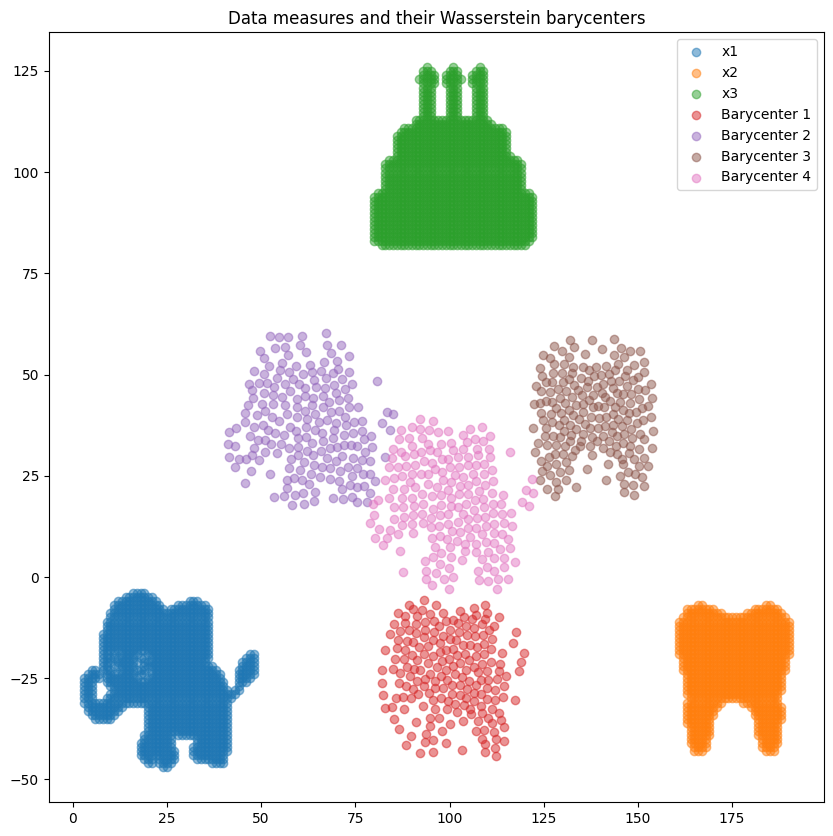

In [56]:
r = 150

weights_list = [[0.5, 0.5, 0], [0.5, 0, 0.5], [0, 0.5, 0.5], [0.33, 0.33, 0.33]]
barycenters = [compute_sliced_wass_barycenter([x1, x2, x3], k=200, rho=weights) for weights in weights_list]

plt.figure(figsize=(10, 10))

plt.scatter(x1[:, 0], x1[:, 1], alpha=0.5, label="x1")
plt.scatter(x2[:, 0] + r, x2[:, 1], alpha=0.5, label="x2")
plt.scatter(x3[:, 0] + r/2, x3[:, 1] +  np.sqrt(3) * r/2, alpha=0.5, label="x3")

offsets = [(r/2, 0), (r/4,  np.sqrt(3) * r/4), (3*r/4, np.sqrt(3) * r/4), ((r+r/2)/3,  (np.sqrt(3) * r)/6)]
labels = ["Barycenter 1", "Barycenter 2", "Barycenter 3", "Barycenter 4"]

for xb, (x_offset, y_offset), label in zip(barycenters, offsets, labels):
    plt.scatter(xb[:, 0] + x_offset, xb[:, 1] + y_offset, alpha=0.5, label=label)

plt.title("Data measures and their Wasserstein barycenters")
plt.legend()
plt.show()
